In [1]:
import sys
sys.path.append("..\..")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from src.data.datasets.overlaps import OverlapsDataset

C:\Temp\ipykernel_16544\4049923964.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dataset = OverlapsDataset.from_path("..\\..\\datasets\\PlagiNet")

Extracting non-overlapping features: 100%|██████████| 760/760 [00:22<00:00, 33.53it/s]


In [3]:
classifier = RandomForestClassifier(class_weight='balanced', max_depth=1, random_state=42)

In [4]:
df = pd.DataFrame(
    np.concatenate([dataset.features, dataset.targets.reshape(-1, 1)], axis=1), 
    columns=dataset.feature_names + ['is_overlapping']
)
df

,levenshtein_distance,match_len1,match_len2,match_ratio1,match_ratio2,note_C,note_C♯,note_D,note_D♯,note_E,...,interval_6,interval_7,interval_8,interval_9,interval_10,interval_lt,interval_gt,interval_to_rest,interval_from_rest,is_overlapping
0,0.235290,-0.506027,-0.508394,-0.562391,-0.563156,-0.525179,-0.721058,-0.441421,-0.668382,-0.912110,...,-0.407332,0.014410,-0.397618,-0.271666,-0.328564,-0.473907,-0.365269,-1.004430,-1.004430,1.0
1,-1.185390,1.146240,0.846692,1.409168,0.263556,-0.914570,0.333407,-0.587439,-0.668382,-0.510787,...,-0.407332,0.991754,-0.397618,-0.271666,-0.328564,-0.473907,-0.365269,-0.347445,-0.347445,1.0
2,-1.181321,2.417214,0.969882,2.598739,2.565198,-0.135788,-0.325633,-1.025490,-0.136766,-0.611117,...,2.455000,-0.474263,1.869871,-0.271666,-0.328564,-0.473907,-0.365269,-1.332923,-1.332923,1.0
3,-1.176717,0.193009,3.864841,-0.083391,2.257328,3.238934,-0.193825,-0.295404,0.394850,-0.912110,...,-0.407332,-0.962935,-0.397618,-0.271666,-0.328564,2.436703,-0.365269,0.966527,0.966527,1.0
4,1.622277,-0.506027,-0.508394,-0.562391,-0.563156,1.681370,-0.721058,-0.295404,-0.668382,0.592852,...,-0.407332,0.991754,0.106268,4.295141,3.043544,-0.473907,2.416274,-1.332923,-1.332923,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,-0.032375,-0.506027,-0.508394,-0.562391,-0.563156,-0.525179,-0.721058,0.580699,-0.668382,-0.410456,...,-0.407332,-0.962935,-0.397618,-0.271666,-0.328564,-0.473907,-0.365269,-1.332923,-1.332923,0.0
776,-0.032375,-0.506027,-0.508394,-0.562391,-0.563156,-0.914570,-0.589250,-1.025490,-0.668382,-0.912110,...,-0.407332,-0.962935,-0.397618,-0.271666,-0.328564,-0.473907,-0.365269,-0.018952,-0.018952,0.0
777,-0.032375,-0.506027,-0.508394,-0.562391,-0.563156,-0.914570,-0.589250,-1.025490,-0.668382,-0.912110,...,-0.407332,-0.962935,-0.397618,-0.271666,-0.328564,-0.473907,-0.365269,-0.018952,-0.018952,0.0
778,-0.032375,-0.506027,-0.508394,-0.562391,-0.563156,-0.914570,0.201599,-1.025490,0.040439,-0.912110,...,-0.407332,-0.962935,-0.397618,-0.271666,-0.328564,-0.473907,-0.365269,-0.018952,-0.018952,0.0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(dataset.features, dataset.targets, test_size=0.2, random_state=42, stratify=dataset.targets)

In [6]:
classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=1, random_state=42)

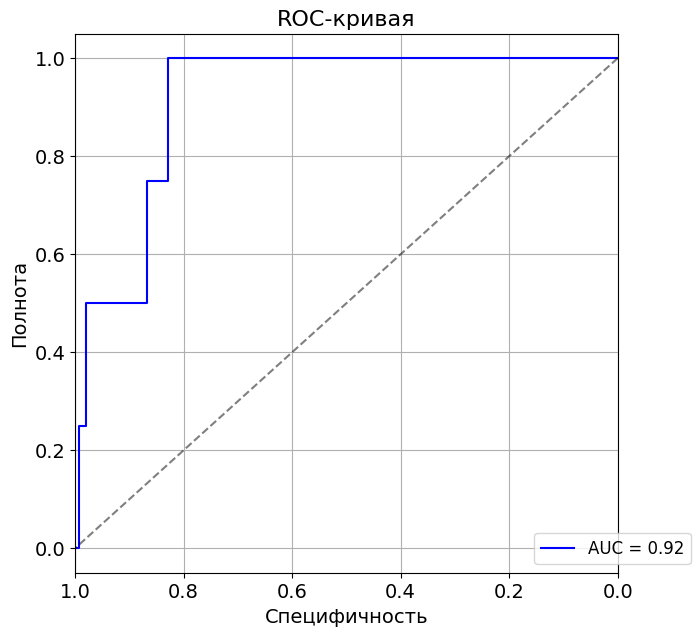

In [7]:
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 7))

plt.plot(1-fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0, 1], [1, 0], color="black", linestyle="--", alpha=0.5)
plt.xlabel("Специфичность", fontsize=14)
plt.ylabel("Полнота", fontsize=14)
plt.xlim((1, 0))
plt.legend(loc="lower right", bbox_to_anchor=(1.15, 0), fontsize=12)
plt.grid(True)
plt.title("ROC-кривая", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)

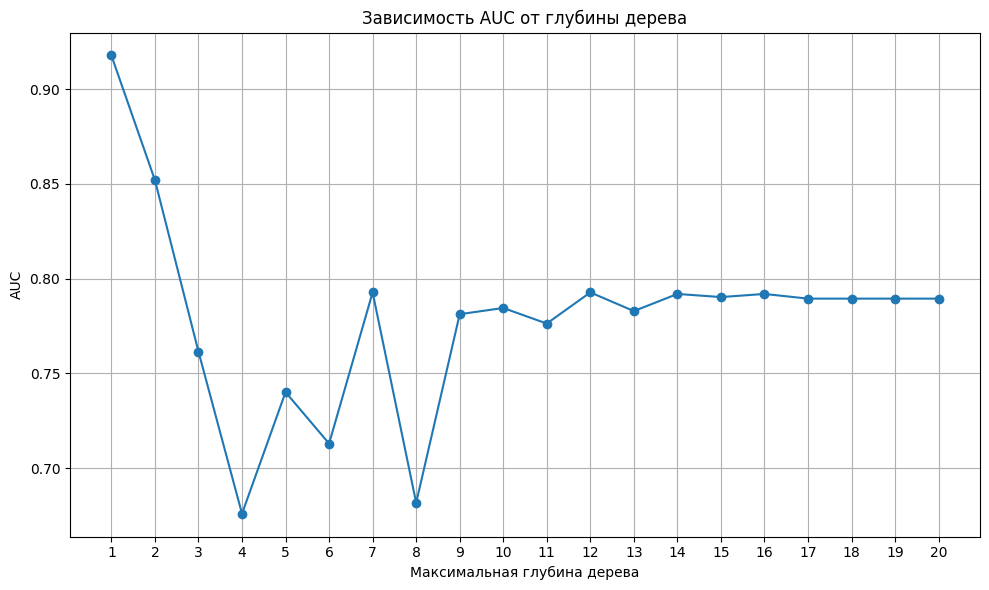

In [10]:
MAX_DEPTHS = range(1, 21)
X_train, X_test, y_train, y_test = train_test_split(dataset.features, dataset.targets, test_size=0.2, random_state=42, stratify=dataset.targets)

depths = []
aucs = []

for max_depth in MAX_DEPTHS:
    classifier = RandomForestClassifier(class_weight='balanced', max_depth=max_depth, random_state=42)
    classifier.fit(X_train, y_train)
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    depths.append(max_depth)
    aucs.append(roc_auc)

plt.figure(figsize=(10, 6))
plt.plot(depths, aucs, marker='o')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('AUC')
plt.title('Зависимость AUC от глубины дерева')
plt.grid(True)
plt.xticks(depths)
plt.tight_layout()
plt.show()